# Desafio 3 - Data Science

Aluno: Igor Costa Gomes Souza

Curso: ADS 1ºP - SENAC

## Importação de bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

## Carregamento e display de tabela geral

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')

In [ ]:
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Informações gerais da tabela
* Verificar tipos de dados
* Verificar quantidade de colunas e linhas
* Verificação de elementos nulos na tabela

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## Detalhamento estatístico
* Análise de métricas estatísticas gerais (quartis, mediana, desvio padrão, média,etc)
* Display de correlação de variáveis através de estrutura de laço
* Correlação focada no cruzamento de qualidade com as demais variáveis
* Verificação gráfica de de quantidade de produtos filtrados pela qualidade

In [ ]:
df.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
#Laço para percorrer as colunas e analisar correlação relativa à qualidade 
for x in df.columns:
    print(df[[x,'quality']].corr())
    #Espaçamento
    print()

               fixed acidity   quality
fixed acidity       1.000000  0.124052
quality             0.124052  1.000000

                  volatile acidity   quality
volatile acidity          1.000000 -0.390558
quality                  -0.390558  1.000000

             citric acid   quality
citric acid     1.000000  0.226373
quality         0.226373  1.000000

                residual sugar   quality
residual sugar        1.000000  0.013732
quality               0.013732  1.000000

           chlorides   quality
chlorides   1.000000 -0.128907
quality    -0.128907  1.000000

                     free sulfur dioxide   quality
free sulfur dioxide             1.000000 -0.050656
quality                        -0.050656  1.000000

                      total sulfur dioxide  quality
total sulfur dioxide                1.0000  -0.1851
quality                            -0.1851   1.0000

          density   quality
density  1.000000 -0.174919
quality -0.174919  1.000000

               pH   qualit

(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

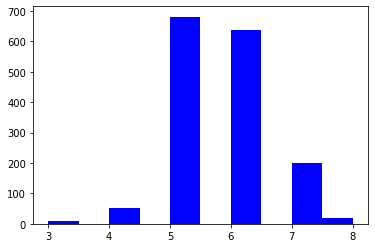

In [ ]:
plt.hist(df.quality,10,density=False, facecolor='blue')

## Machine Learning
>_Aqui o objetivo será avaliar os melhores vinhos baseado nas suas variáveis/atributos_
* Definição de variáveis a serem analisadas e variável a ser prevista
* Estabelecimento de condições de treino e teste da IA
* Escolha de classificador ou IA que fará o processo
* Estabelecimento de predição desejada
* Retorno de probabilidade de acerto

In [ ]:
x = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].copy()

In [ ]:
y= df[['quality']].copy()

In [ ]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=400)

In [ ]:
classificador = RandomForestClassifier() 

In [ ]:
classificador.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction = classificador.predict(x_test)

In [ ]:
accuracy_score(y_true=y_test, y_pred=prediction)

0.725

## **Conclusão**  
* Dentre todas as correlações o teor alcoólico é o fator que mais se aproxima de ser um ponto chave na qualidade do produto 
* A maioria dos vinhos estão com a qualidade listada entre 5-6
* Grande parte dos índices de correlação são insuficientes ou fracos para uma análise
* Dentre as IA's testadas a mais eficiente foi o RandomForestClassifier
* A IA possui uma taxa e acerto de 73%
  * Probabilidade satisfatória para obtenção de norteamento sobre a qualidade do produto